<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825590 sha256=8501a8d0a24d257a78e2db750c956f1537ce64a9d8f8966074efe4f4e49e08d1
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437046 sha256=708252de49d21ad580edde1aef564ebb0359935af0ef7cf234dbd58e1e226524
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [423]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute30", count=420)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                           open        high         low       close  \
2023-03-29 07:30:00  35948000.0  35964000.0  35920000.0  35944000.0   
2023-03-29 08:00:00  35945000.0  36079000.0  35944000.0  36007000.0   
2023-03-29 08:30:00  36005000.0  36085000.0  35999000.0  36026000.0   
2023-03-29 09:00:00  36020000.0  36189000.0  36006000.0  36152000.0   
2023-03-29 09:30:00  36152000.0  36168000.0  36054000.0  36122000.0   
...                         ...         ...         ...         ...   
2023-04-08 18:30:00  37119000.0  37123000.0  37050000.0  37053000.0   
2023-04-08 19:00:00  37053000.0  37090000.0  37047000.0  37076000.0   
2023-04-08 19:30:00  37087000.0  37087000.0  37037000.0  37054000.0   
2023-04-08 20:00:00  37057000.0  37071000.0  37022000.0  37033000.0   
2023-04-08 20:30:00  37033000.0  37049000.0  37031000.0  37031000.0   

                         volume         value  
2023-03-29 07:30:00   66.665670  2.395830e+09  
2023-03-29 08:00:00  128.806176  4.638981e+09  
202

In [424]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-29 07:30:00,35944000.0
1,2023-03-29 08:00:00,36007000.0
2,2023-03-29 08:30:00,36026000.0
3,2023-03-29 09:00:00,36152000.0
4,2023-03-29 09:30:00,36122000.0
...,...,...
495,2023-04-08 18:30:00,37053000.0
496,2023-04-08 19:00:00,37076000.0
497,2023-04-08 19:30:00,37054000.0
498,2023-04-08 20:00:00,37033000.0


In [425]:
#prophet 불러옴
from fbprophet import Prophet

In [426]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [427]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


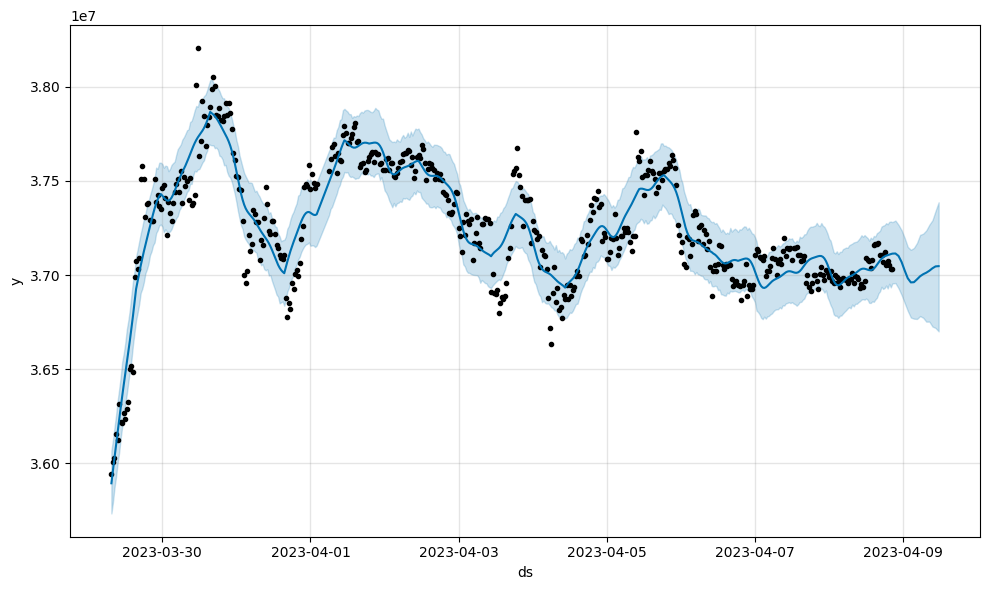

In [428]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


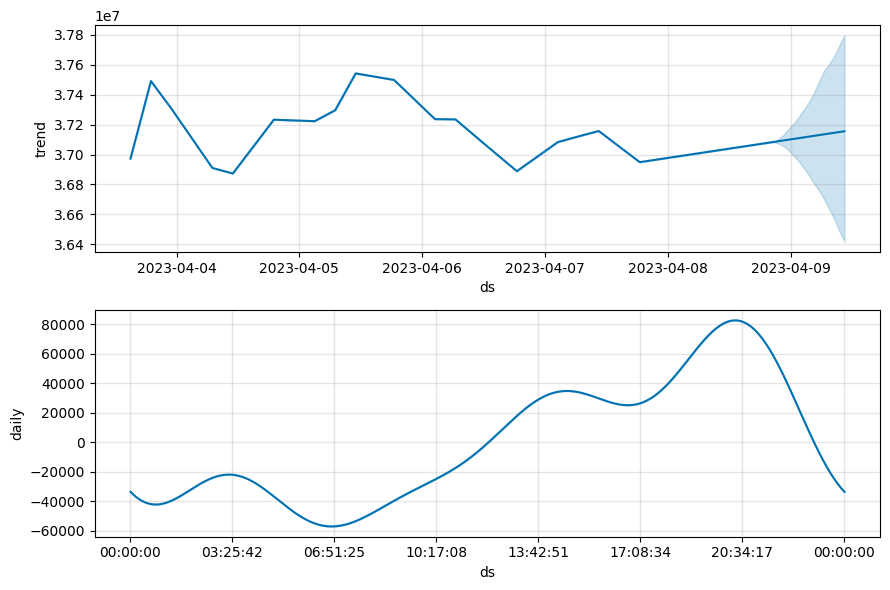

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)